### Описание данных

#### Данные для первой части:
Файл /datasets/hypothesis.csv:

- *Hypothesis* — краткое описание гипотезы;
- *Reach* — охват пользователей по 10-балльной шкале;
- *Impact* — влияние на пользователей по 10-балльной шкале;
- *Confidence* — уверенность в гипотезе по 10-балльной шкале;
- *Efforts* — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

#### Данные для второй части:
Файл /datasets/orders.csv:

- *transactionId* — идентификатор заказа;
- *visitorId* — идентификатор пользователя, совершившего заказ;
- *date* — дата, когда был совершён заказ;
- *revenue* — выручка заказа;
- *group* — группа A/B-теста, в которую попал заказ.


Файл /datasets/visitors.csv

- *date* — дата;
- *group* — группа A/B-теста;
- *visitors* — количество пользователей в указанную дату в указанной группе A/B-теста

### Изучим общую информацию и обработаем данные

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from matplotlib.ticker import FuncFormatter

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

#### Таблица hypothesis:

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Пропусков, некорректных типов данных и дубликатов нет

#### Таблица orders:

In [5]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Изменим формат столбцов, где есть даты с object на формат даты:

In [7]:
orders['date'] = pd.to_datetime(orders['date'])

Проверка на наличие пропусков и дубликатов:

In [8]:
print(orders.isnull().sum())

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64


In [9]:
orders.duplicated().sum()

0

Пропуски и дубликаты отсутствуют

#### Таблица visitors:

In [10]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [11]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Изменим формат столбцов, где есть даты с object на формат даты:

In [12]:
visitors['date'] = pd.to_datetime(visitors['date'])

Проверка на наличие пропусков и дубликатов:

In [13]:
print(visitors.isnull().sum())

date        0
group       0
visitors    0
dtype: int64


In [14]:
visitors.duplicated().sum()

0

Пропуски и дубликаты отсутствуют




### Приоритезация:

In [15]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [16]:
hypothesis['Hypothesis'].value_counts()

Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов                        1
Запустить акцию, дающую скидку на товар в день рождения                                                         1
Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей              1
Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок                1
Запустить собственную службу доставки, что сократит срок доставки заказов                                       1
Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию            1
Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей                                1
Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар             1
Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию 

#### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета:

In [17]:
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis = hypothesis.round(2).sort_values(by='ICE')
hypothesis.index = range(len(hypothesis))
hypothesis_ICE = hypothesis[['Hypothesis', 'ICE']].reset_index()
hypothesis_ICE.columns = ['ICE_priority', 'Hypothesis', 'ICE']
hypothesis_ICE['ICE_priority'] += 1
hypothesis_ICE

,ICE_priority,Hypothesis,ICE
0,1,"Изменить цвет фона главной страницы, чтобы уве...",1.00
1,2,"Изменить структура категорий, что увеличит кон...",1.12
2,3,"Добавить страницу отзывов клиентов о магазине,...",1.33
3,4,"Запустить собственную службу доставки, что сок...",2.00
4,5,Добавить блоки рекомендаций товаров на сайт ин...,7.00
5,6,Показать на главной странице баннеры с актуаль...,8.00
6,7,Добавить форму подписки на все основные страни...,11.20
7,8,"Добавить два новых канала привлечения трафика,...",13.33
8,9,"Запустить акцию, дающую скидку на товар в день...",16.20


#### Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета:

In [18]:
hypothesis['RICE'] = hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence']/hypothesis['Efforts']
hypothesis = hypothesis.round(2).sort_values(by='RICE')
hypothesis.index = range(len(hypothesis))
hypothesis_RICE = hypothesis[['Hypothesis', 'RICE']].reset_index()
hypothesis_RICE.columns = ['RICE_priority', 'Hypothesis', 'RICE']
hypothesis_RICE['RICE_priority'] += 1
hypothesis_RICE

,RICE_priority,Hypothesis,RICE
0,1,"Изменить цвет фона главной страницы, чтобы уве...",3.0
1,2,"Добавить страницу отзывов клиентов о магазине,...",4.0
2,3,"Запустить собственную службу доставки, что сок...",4.0
3,4,"Изменить структура категорий, что увеличит кон...",9.0
4,5,"Запустить акцию, дающую скидку на товар в день...",16.2
5,6,Показать на главной странице баннеры с актуаль...,40.0
6,7,"Добавить два новых канала привлечения трафика,...",40.0
7,8,Добавить блоки рекомендаций товаров на сайт ин...,56.0
8,9,Добавить форму подписки на все основные страни...,112.0


Изменение приоритизации гипотез при применении RICE вместо ICE:

In [19]:
total = hypothesis_ICE.merge(hypothesis_RICE, on='Hypothesis')
total = total[['Hypothesis', 'ICE_priority', 'RICE_priority']]
total

,Hypothesis,ICE_priority,RICE_priority
0,"Изменить цвет фона главной страницы, чтобы уве...",1,1
1,"Изменить структура категорий, что увеличит кон...",2,4
2,"Добавить страницу отзывов клиентов о магазине,...",3,2
3,"Запустить собственную службу доставки, что сок...",4,3
4,Добавить блоки рекомендаций товаров на сайт ин...,5,8
5,Показать на главной странице баннеры с актуаль...,6,6
6,Добавить форму подписки на все основные страни...,7,9
7,"Добавить два новых канала привлечения трафика,...",8,7
8,"Запустить акцию, дающую скидку на товар в день...",9,5


Параметр RISE использует охват аудитории по сравнению с ICE, что могло повлиять на приоритезацию. На первом месте по параметру ICE шла акция к дню рождению, но RISE сдвинул приоритет на 4 позиции, что справидливо, т.к. акция имеет меньший охват, чем другие гипотезы. Добавление охвата понизило приоритет таких гипотез как, два новых канала трафика, запуск службы доставки. Выросли показатели гипотезы, добавления рекомендаций, изменение структуры категорий т.к. это затрагивает грубо говоря, всех пользователей. Неизменили свои позиции гипотезы изменения цвета фона, показ на главной странице баннеров с актуальными акциями



### Проанализируем A/B-тест:

Создадим массив уникальных пар значений дат и групп теста методом drop_duplicates():

In [20]:
datesGroups = orders[['date','group']].drop_duplicates()

In [21]:
datesGroups

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


Получим строки таблицы orders, дата которых меньше или равна дате элемента из datesGroups, а группа теста равна группе из datesGroups:

In [22]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
        'date' : 'max', 
        'group' : 'max', 
        'transactionId' : pd.Series.nunique, 
        'visitorId' : pd.Series.nunique, 
        'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина:

In [23]:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
        'date' : 'max', 
        'group' : 'max', 
        'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

Объединим обе таблицы в одной с понятными названиями столбцов:

In [24]:
cummulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cummulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [25]:
print(cummulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


Датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А:

In [26]:
cummulativeRevenueA = cummulativeData[cummulativeData['group']=='A'][['date','revenue', 'orders']]

Датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B:

In [27]:
cummulativeRevenueB = cummulativeData[cummulativeData['group']=='B'][['date','revenue', 'orders']]

#### Построим график кумулятивной выручки по группам:

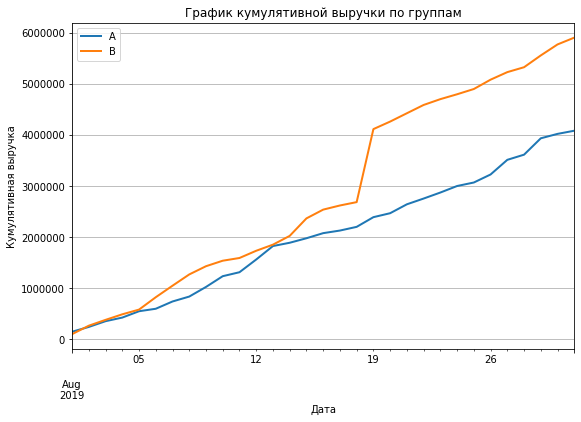

In [28]:
ax = cummulativeRevenueA.plot(x='date', y='revenue',  style='-', fontsize=10, figsize=(9,6), kind='line', label='A', linewidth=2)
cummulativeRevenueB.plot(ax=ax, x='date', y='revenue', style='-', fontsize=10, figsize=(9,6), kind='line', label='B', linewidth=2)
ax.set_ylabel("Кумулятивная выручка")
ax.set_xlabel("Дата")
ax.set_title('График кумулятивной выручки по группам')
ax.grid()
plt.legend()

Мы видим, на всем временном периоде график кумулятивной выручки группы B лежит выше, чем график кумулятивной выручки группы A. По полученным данным можно сделать вывод, что пользователи приносят больше денег, когда видят отображение версии сайта, предосталенной группе B

В течение всего периода график кумулятивной выручки группы B лежит выше, чем график кумулятивной выручки группы A.
Получается, что пользователи, посещающие наш сайт в версии "B", приносят нам больше денег.



#### Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

In [29]:
cummulativeRevenueA['avg_check'] = cummulativeRevenueA['revenue'] / cummulativeRevenueA['orders']
cummulativeRevenueB['avg_check'] = cummulativeRevenueB['revenue'] / cummulativeRevenueB['orders']

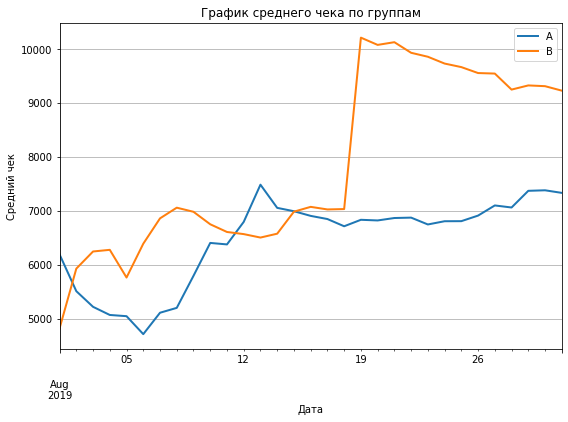

In [30]:
ax = cummulativeRevenueA.plot(x='date', y='avg_check',  style='-', fontsize=10, figsize=(9,6), kind='line', label='A', linewidth=2)
cummulativeRevenueB.plot(ax=ax, x='date', y='avg_check', style='-', fontsize=10, figsize=(9,6), kind='line', label='B', linewidth=2)
ax.set_ylabel("Средний чек")
ax.set_xlabel("Дата")
ax.set_title('График среднего чека по группам')
ax.grid()
plt.legend()

На большей части графика средний чек по группе B выше, чем по группе A. Но мы видим резкий подъем на графике 18 августа для значения сренего чека группы B, это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке Средний чек становится равномерным ближе к концу теста, группа B все также занимает лидирующие позиции, но в динамике видно, что постепенно средний чек B падает, но он попрежнему выше A, как раз из-за этого резкого 

<font color='blue'> Правильно. </font>

#### Построим график относительного различия для среднего чека:

In [31]:
mergedCummulativeRevenue = cummulativeRevenueA.merge(cummulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

In [32]:
mergedCummulativeRevenue['ratio_avg'] = (mergedCummulativeRevenue['revenueB']/mergedCummulativeRevenue['ordersB'])/(mergedCummulativeRevenue['revenueA']/mergedCummulativeRevenue['ordersA'])-1

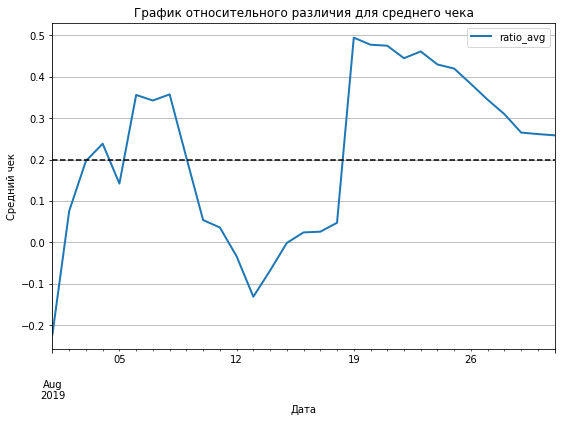

In [33]:
ax = mergedCummulativeRevenue.plot(x='date', y='ratio_avg',  style='-', fontsize=10, figsize=(9,6), kind='line', linewidth=2)
ax.set_ylabel("Средний чек")
ax.set_xlabel("Дата")
ax.set_title('График относительного различия для среднего чека')
plt.legend()
ax.grid()
plt.axhline(y=0.2, color='black', linestyle='--')

Видно по графику резкие скачки, вероятно это крупные закази и выбросы



#### Построим график кумулятивной конверсии:

In [34]:
cummulativeData['conversion'] = cummulativeData['orders']/cummulativeData['visitors']

In [35]:
cummulativeDataA = cummulativeData[cummulativeData['group']=='A']
cummulativeDataB = cummulativeData[cummulativeData['group']=='B']

Text(0.5, 1.0, 'График кумулятивной конверсии')

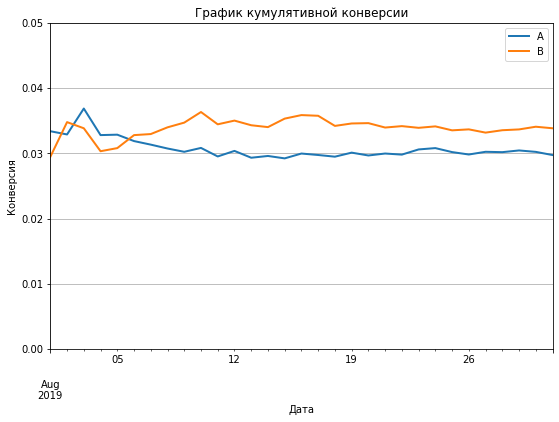

In [36]:
ax = cummulativeDataA.plot(x='date', y='conversion',  style='-', fontsize=10, ylim = (0, 0.05), figsize=(9,6), kind='line', label='A', linewidth=2)
cummulativeDataB.plot(ax=ax, x='date', y='conversion', style='-', fontsize=10, ylim = (0, 0.05),figsize=(9,6), kind='line', label='B', linewidth=2)
ax.set_ylabel("Конверсия")
ax.set_xlabel("Дата")
ax.grid()
ax.set_title('График кумулятивной конверсии')

В начале группа A имела большую конверсию, но постепенно группа B выровнилась и зафиксировалась около одного значения, большего значения A.



#### Построим график относительного различия кумулятивных конверсий:

In [37]:
mergedCummulativeConversions = cummulativeDataA[['date','conversion']].merge(cummulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

In [38]:
mergedCummulativeConversions['ration_cnv'] = mergedCummulativeConversions['conversionB']/mergedCummulativeConversions['conversionA']-1

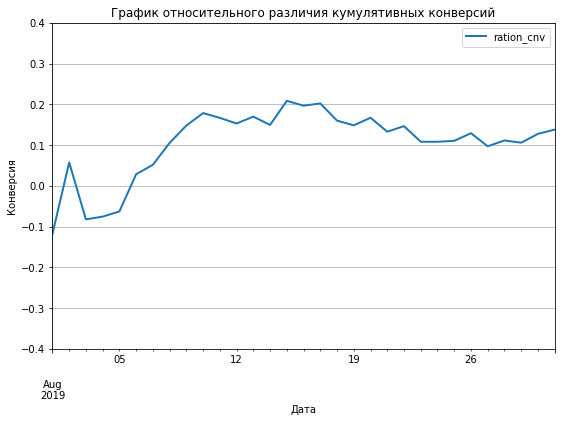

In [39]:
ax = mergedCummulativeConversions.plot(x='date', y='ration_cnv',  style='-', fontsize=10, figsize=(9,6), ylim = (-0.4, 0.4), kind='line', linewidth=2)
ax.set_ylabel("Конверсия")
ax.set_xlabel("Дата")
ax.set_title('График относительного различия кумулятивных конверсий')
ax.grid()
plt.legend()

Практически с самого начала исследования группа B лидирует по конверсии



#### Построим точечный график количества заказов по пользователям:

In [40]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsers.columns = ['visitors','orders']

In [41]:
print(ordersByUsers.sort_values(by='orders',ascending=False).head(10))

        visitors  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


In [42]:
ordersByUsers['observation'] = range(1, len(ordersByUsers)+1)

Text(0.5, 1.0, 'Гистрограмма распределения количества заказов на одного пользователя')

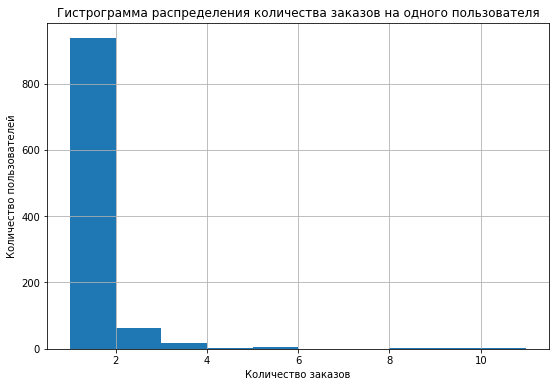

In [43]:
ax = ordersByUsers['orders'].hist(bins=10, figsize=(9,6))
ax.set_ylabel("Количество пользователей")
ax.set_xlabel("Количество заказов")
ax.set_title('Гистрограмма распределения количества заказов на одного пользователя')

#### Построим точечную диаграмму числа заказов на одного пользователя:

Text(0.5, 1.0, 'Гистрограмма распределения количества заказов на одного пользователя')

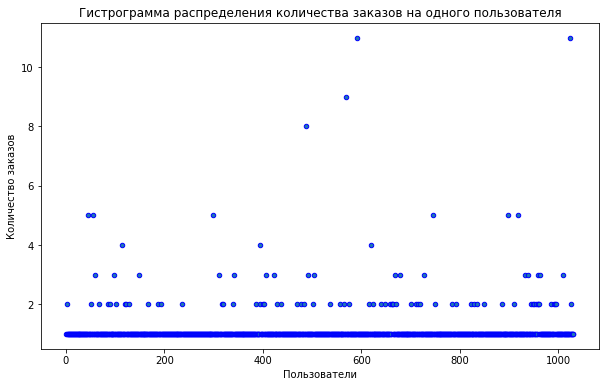

In [44]:
ax = ordersByUsers.plot(x='observation', y='orders',ec='blue', kind='scatter', figsize=(10,6))
ax.set_ylabel("Количество заказов")
ax.set_xlabel("Пользователи")
ax.set_title('Гистрограмма распределения количества заказов на одного пользователя')


Видим, что большая часть пользователей делает 1 заказ

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя:

In [45]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Не более 5% пользователей оформляли больше, чем 2 заказа. И 1% пользователей заказывали более 4 раз. Выберем 4 заказа на одного пользователя за границу числа заказов

#### Построим точечный график стоимостей заказов:

Text(0.5, 1.0, 'Гистрограмма распределения стоимости заказов')

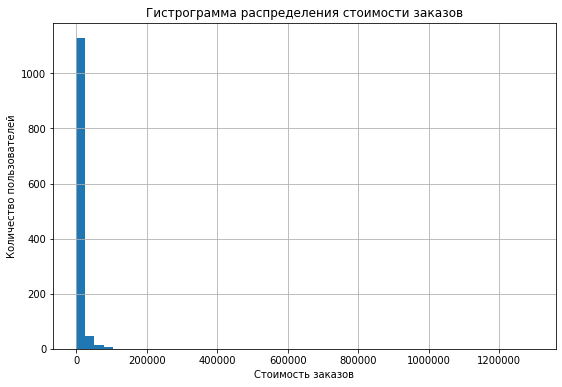

In [46]:
ax = orders['revenue'].hist(bins=50, figsize=(9,6))
ax.set_ylabel("Количество пользователей")
ax.set_xlabel("Стоимость заказов")
ax.set_title('Гистрограмма распределения стоимости заказов')

Построим точечную диаграмму стоимости заказов:

In [47]:
orders['observation'] = range(1, len(orders)+1)

Text(0.5, 1.0, 'Гистрограмма распределения стоимости заказов')

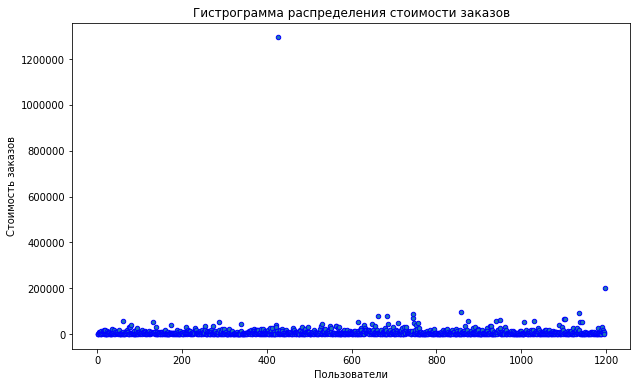

In [48]:
ax = orders.plot(x='observation', y='revenue',ec='blue', kind='scatter', figsize=(10,6))
ax.set_ylabel("Стоимость заказов")
ax.set_xlabel("Пользователи")
ax.set_title('Гистрограмма распределения стоимости заказов')

Изменим мастштаб:

Text(0.5, 1.0, 'Гистрограмма распределения стоимости заказов')

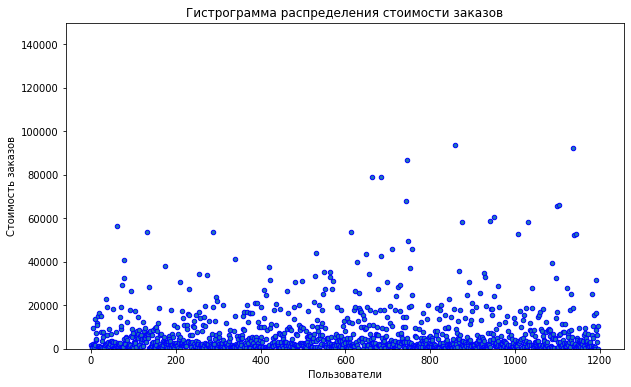

In [49]:
ax = orders.plot(x='observation', y='revenue',ec='blue', ylim = (0, 150000), kind='scatter', figsize=(10,6))
ax.set_ylabel("Стоимость заказов")
ax.set_xlabel("Пользователи")
ax.set_title('Гистрограмма распределения стоимости заказов')

Посчитаем 95-й и 99-й перцентили перцентили стоимости заказов:

In [50]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Суммы на которые пользователи совершают покупки обычно не превышают 28000. Но есть выбросы, присутствует значение, сильно отличающееся от других в 1,3 млн. Так же мы получили, что 95ый процентиль равен приблизительно 28000, 99ый - 58000. Выберем 60000 за  границу фильтрации стоимости заказов


#### Очистка данных:

Рассмотрим группу А , надем количество пользователей по дате:

In [51]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

Кумулятивное значение пользователей по датам:

In [52]:
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

Делаем тоже самое, для группы B:

In [53]:
visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

In [54]:
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

Для группы A найдем количество покупок и выручку в день: 

In [55]:
ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

Для группы A найдем кумулятивное количество покупок и выручку:

In [56]:
ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

Делаем тоже самое, для группы B:

In [57]:
ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

In [58]:
ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

Создадим таблицу data:

In [59]:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

In [60]:
print(data.head(5))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

#### Посчитаем статистическую значимость различия в конверсии между группами.

In [61]:
import scipy.stats as stats

Создадим переменные ordersByUsersA и ordersByUsersB со столбцами 'userId', 'orders'. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов

In [62]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [63]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [64]:
alpha = .05

results = st.mannwhitneyu(sampleA, sampleB)

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

p-значение:  0.008396177528376304
Отвергаем нулевую гипотезу: разница статистически значима


#### Нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем.

#### Найдём относительные различия в среднем чеке между группами:

In [65]:
checkA = orders[orders['group']=='A']['revenue']
checkB = orders[orders['group']=='B']['revenue']

In [66]:
alpha = .05

results = st.mannwhitneyu(checkA, checkB)

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

p-значение:  0.3646454927716229
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


Причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 



 Приступаем к подготовке очищенных от аномалий данных:


Примем за аномальных пользователей тех, кто совершил от 4 заказов или совершил заказ дороже 60 000 рублей

Узнаем, сколько всего аномальных пользователей:

In [67]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 3]['visitorId'], ordersByUsersB[ordersByUsersB['orders'] > 3]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 60000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

1099    148427295
18      199603092
23      237748145
949     887908475
744     888512513
Name: visitorId, dtype: int64
(19,)


Получаем 19 аномальных пользователей

Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным.

Получим выборки количества заказов по пользователям по группам теста:

In [68]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

In [69]:
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0)

#### Применим статистический критерий Манна-Уитни к полученным выборкам:

In [70]:
alpha = .05

results = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

p-значение:  0.0064107822104140545
Отвергаем нулевую гипотезу: разница статистически значима


#### Результаты по конверсии практически не изменились. Нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем

Рассмотрим результаты по среднему чеку:

In [71]:
checkA_clean = orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue']

In [74]:
checkA_clean

2         400
7        1044
8       13710
10       4008
12       7370
        ...  
1187      750
1188      112
1193     3190
1194    10550
1195      100
Name: revenue, Length: 518, dtype: int64

In [72]:
checkB_clean = orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue']

In [73]:
alpha = .05

results = st.mannwhitneyu(checkA_clean, checkB_clean)

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

p-значение:  0.4603861536647071
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


Как и с не очищенными данными, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет




### Вывод:

Тест следует остановить и признать его успешным. В ходе теста были получены данные, что конверсия из пользователя в покупателя у группы B статистически значимо выше, чем у группы A. Средний чек между группами A и B остается не различается

